In [1]:
%run util.py

In [2]:
from io import StringIO

In [10]:
csv_data = """
A,B,C,D
1,2.,3.,4
5,6.,,8
10,11.,12
"""

In [14]:
df = pd.read_csv(StringIO(csv_data)).astype(float)

In [15]:
df

,A,B,C,D
0,1.0,2.0,3.0,4.0
1,5.0,6.0,NaN,8.0
2,10.0,11.0,12.0,NaN


In [16]:
df.isnull().sum()

A    0
B    0
C    1
D    1
dtype: int64

In [17]:
df.values

array([[ 1.,  2.,  3.,  4.],
       [ 5.,  6., nan,  8.],
       [10., 11., 12., nan]])

In [18]:
df.dropna(axis=0)

,A,B,C,D
0,1.0,2.0,3.0,4.0


In [19]:
df.dropna(axis=1)

,A,B
0,1.0,2.0
1,5.0,6.0
2,10.0,11.0


In [20]:
df.dropna(how='all')

,A,B,C,D
0,1.0,2.0,3.0,4.0
1,5.0,6.0,NaN,8.0
2,10.0,11.0,12.0,NaN


In [22]:
df.dropna(subset=['C'])

,A,B,C,D
0,1.0,2.0,3.0,4.0
2,10.0,11.0,12.0,NaN


In [26]:
from sklearn.impute import SimpleImputer

In [28]:
imr = SimpleImputer()

In [29]:
imr = imr.fit(df.values)

In [30]:
imputed_data = imr.transform(df.values)

In [31]:
imputed_data

array([[ 1. ,  2. ,  3. ,  4. ],
       [ 5. ,  6. ,  7.5,  8. ],
       [10. , 11. , 12. ,  6. ]])

In [32]:
df = pd.DataFrame([
    ['green', 'M', 10.1, 'class1'],
    ['red', 'L', 13.5, 'class2'],
    ['blue', 'XL', 15.3, 'class1'],
])
df.columns = ['color', 'size', 'price', 'classlabel']

In [33]:
df

,color,size,price,classlabel
0,green,M,10.1,class1
1,red,L,13.5,class2
2,blue,XL,15.3,class1


In [34]:
size_mapping = {
    'XL':3, 'L':2, 'M':1
}

In [36]:
df['size'] = df['size'].map(size_mapping)

In [37]:
df

,color,size,price,classlabel
0,green,1,10.1,class1
1,red,2,13.5,class2
2,blue,3,15.3,class1


In [45]:
inv_size_mapping = {v:k for k, v in size_mapping.items()}

In [39]:
df['size'].map(inv_size_mapping)

0     M
1     L
2    XL
Name: size, dtype: object

In [40]:
class_mapping = {label:idx for idx, label in enumerate(np.unique(df['classlabel']))}

In [41]:
class_mapping

{'class1': 0, 'class2': 1}

In [42]:
df['classlabel'] = df.classlabel.map(class_mapping)

In [46]:
inv_class_mapping = {v:k for k, v in class_mapping.items()}

In [47]:
df['classlabel'] = df.classlabel.map(inv_class_mapping)

In [48]:
df

,color,size,price,classlabel
0,green,1,10.1,class1
1,red,2,13.5,class2
2,blue,3,15.3,class1


In [49]:
from sklearn.preprocessing import LabelEncoder

In [50]:
class_le = LabelEncoder()

In [51]:
y = class_le.fit_transform(df['classlabel'])

In [52]:
y

array([0, 1, 0])

In [53]:
class_le.inverse_transform(y)

array(['class1', 'class2', 'class1'], dtype=object)

In [65]:
X = df[['color', 'size', 'price']].values

In [55]:
color_le = LabelEncoder()

In [56]:
X[:, 0] = color_le.fit_transform(X[:, 0])

In [57]:
X

array([[1, 1, 10.1],
       [2, 2, 13.5],
       [0, 3, 15.3]], dtype=object)

In [58]:
from sklearn.preprocessing import OneHotEncoder

In [70]:
X = df[['color', 'size', 'price']]

In [75]:
X

,color,size,price
0,green,1,10.1
1,red,2,13.5
2,blue,3,15.3


In [76]:
X.dtypes

color     object
size       int64
price    float64
dtype: object

In [79]:
ohe = OneHotEncoder(categories=['color'])

In [63]:
X

array([[1, 1, 10.1],
       [2, 2, 13.5],
       [0, 3, 15.3]], dtype=object)

In [83]:
pd.get_dummies(X, drop_first=True)

,size,price,color_green,color_red
0,1,10.1,1,0
1,2,13.5,0,1
2,3,15.3,0,0


In [84]:
df_wine = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data', header=None)

In [85]:
df_wine

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [86]:
df_wine.columns = ['class label', 'alcohol', 'malic acid', 'ash', 'alcalinity of ash', 'magnesium', 'total phenols',
                  'flavanoids', 'nonflavanoid phenols', 'proanthocyanins', 'color intensity', 'hue', 'od280/od315 of diluted wines', 'proline']

In [95]:
df_wine.columns = [word.capitalize() for word in df_wine.columns]

In [87]:
df_wine['class label'].unique()

array([1, 2, 3])

In [96]:
df_wine.head()

,Class label,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,Od280/od315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [97]:
from sklearn.model_selection import train_test_split

In [98]:
X, y = df_wine.iloc[:, 1:], df_wine.iloc[:, 0]

In [101]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=0, stratify=y)

In [102]:
from sklearn.preprocessing import MinMaxScaler

In [103]:
mms = MinMaxScaler()

In [105]:
X_train_norm = mms.fit_transform(X_train)
X_test_norm = mms.fit_transform(X_test)

In [106]:
ex = np.array(range(6))

In [108]:
print('standarized:', (ex-ex.mean())/ex.std())

standarized: [-1.46385011 -0.87831007 -0.29277002  0.29277002  0.87831007  1.46385011]


In [109]:
print('normalized:', (ex-ex.min())/(ex.max()-ex.min()))

normalized: [0.  0.2 0.4 0.6 0.8 1. ]


In [110]:
from sklearn.preprocessing import StandardScaler

In [111]:
stdsc = StandardScaler()

In [114]:
X_train_std = stdsc.fit_transform(X_train)

In [115]:
X_test_std = stdsc.transform(X_test)

In [116]:
from sklearn.linear_model import LogisticRegression

In [133]:
lr = LogisticRegression(penalty='l1', C=1.0, solver='saga')
lr.fit(X_train_std, y_train)
print("train", lr.score(X_train_std, y_train))
print("test", lr.score(X_test_std, y_test))
print('intercept', lr.intercept_)

train 1.0
test 1.0
intercept [ 0.4378536   0.60437682 -1.04223041]


/Users/shouta_shimizu/.local/share/virtualenvs/python-machine-learning-6hUrazaR/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


In [134]:
lr = LogisticRegression(penalty='l1', C=1.0, solver='liblinear')

In [135]:
lr.fit(X_train_std, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l1',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [136]:
print("train", lr.score(X_train_std, y_train))
print("test", lr.score(X_test_std, y_test))

train 1.0
test 1.0


In [137]:
lr.intercept_

array([-1.26337843, -1.21616021, -2.3713168 ])

In [138]:
lr.coef_

array([[ 1.2460676 ,  0.1807156 ,  0.74499659, -1.16244049,  0.        ,
         0.        ,  1.16222454,  0.        ,  0.        ,  0.        ,
         0.        ,  0.55455863,  2.50932617],
       [-1.53678329, -0.38775262, -0.99532407,  0.36510669, -0.0594239 ,
         0.        ,  0.66865204,  0.        ,  0.        , -1.93432872,
         1.2329907 ,  0.        , -2.23233094],
       [ 0.13535945,  0.16965891,  0.35761137,  0.        ,  0.        ,
         0.        , -2.43389122,  0.        ,  0.        ,  1.56218774,
        -0.81685505, -0.49752434,  0.        ]])

In [142]:
colors = ['blue', 'green', 'red', 'cyan', 'magenta', 'yellow', 'black', 'pink', 
         'lightgreen', 'lightblue', 'gray', 'indigo', 'orange']
weights, params = [], []
for c in np.arange(-4.,6.):
    lr = LogisticRegression(penalty='l1', solver='liblinear', C=10.**c, random_state=0)
    lr.fit(X_train_std, y_train)
    weights.append(lr.coef_[1])
    params.append(10**c)

weights = np.array(weights)

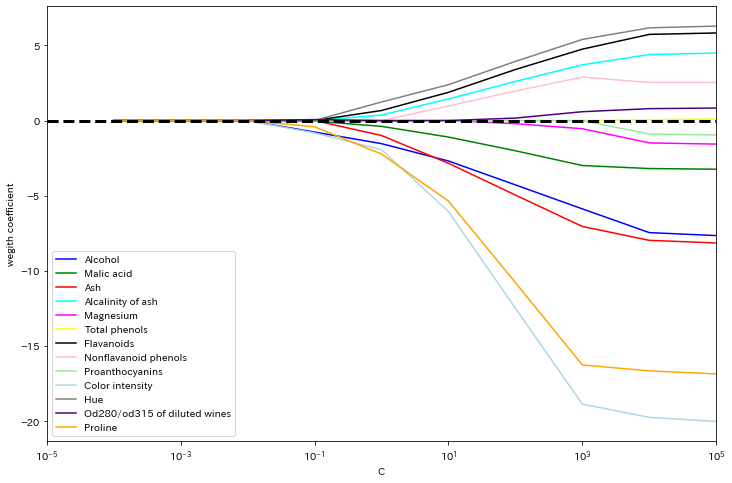

In [149]:
fig = plt.figure(figsize=(12, 8))
ax = plt.subplot(111)

for column, color in zip(range(weights.shape[1]), colors):
    plt.plot(params, weights[:, column], label=df_wine.columns[column+1], color=color)
plt.axhline(0, color='black', linestyle='--', linewidth=3)
plt.xscale('log')
plt.xlim([10**-5, 10**5])
plt.xlabel('C')
plt.ylabel('wegith coefficient')
plt.legend()

In [151]:
from sklearn.base import clone
from itertools import combinations
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [167]:
class SBS:
    def __init__(self, estimator, k_features, scoring=accuracy_score, test_size=0.25, random_state=1):
        self.scoring = scoring
        self.estimator = clone(estimator)
        self.k_features = k_features
        self.test_size = test_size
        self.random_state = random_state
    
    def fit(self, X ,y):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=self.test_size, random_state=self.random_state)
        dim = X_train.shape[1]
        self.indicies_ = tuple(range(dim))
        self.subsets_ = [self.indicies_]
        score = self._calc_score(X_train, y_train, X_test, y_test, self.indicies_)
        self.scores_ = [score]
        
        while dim > self.k_features:
            scores = []
            subsets = []
            
            for p in combinations(self.indicies_, r = dim - 1):
                score = self._calc_score(X_train, y_train, X_test, y_test, p)
                scores.append(score)
                subsets.append(p)
            
            best = np.argmax(score)
            self.indicies_ = subsets[best]
            self.subsets_.append(self.indicies_)
            dim -= 1
            
            self.scores_.append(scores[best])
        self.k_score_ = self.scores_[-1]
        
        return self

    def transform(self, X):
        return X[:, self.indicies_]
    
    def _calc_score(self, X_train, y_train, X_test, y_test, indicies):
        self.estimator.fit(X_train[:, indicies], y_train)
        y_pred = self.estimator.predict(X_test[:, indicies])
        score = self.scoring(y_test, y_pred)
        return score

In [163]:
from sklearn.neighbors import KNeighborsClassifier

In [172]:
knn = KNeighborsClassifier(n_neighbors=5)

In [173]:
sbs = SBS(knn, k_features=1)

In [174]:
sbs.fit(X_train_std, y_train)

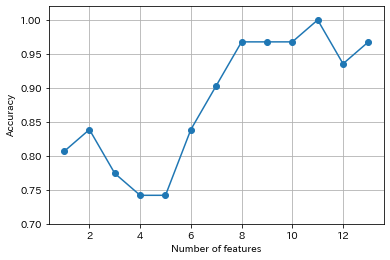

In [175]:
k_feat = [len(k) for k in sbs.subsets_]
plt.plot(k_feat, sbs.scores_, marker='o')
plt.ylim([0.7, 1.02])
plt.ylabel('Accuracy')
plt.xlabel('Number of features')
plt.grid()

In [179]:
from sklearn.ensemble import RandomForestClassifier

In [180]:
feat_labels = df_wine.columns[1:] 

In [181]:
forest = RandomForestClassifier(n_estimators=500, random_state=1)

In [182]:
forest.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=None, oob_score=False, random_state=1, verbose=0,
                       warm_start=False)

In [183]:
importances = forest.feature_importances_

In [185]:
indicies = np.argsort(importances)[::-1]

In [187]:
importances

array([0.11852942, 0.02564836, 0.01327854, 0.02236594, 0.03135708,
       0.05087243, 0.17475098, 0.01335393, 0.02556988, 0.1439199 ,
       0.058739  , 0.13616194, 0.1854526 ])

In [186]:
indicies

array([12,  6,  9, 11,  0, 10,  5,  4,  1,  8,  3,  7,  2])

In [197]:
for f in range(X_train.shape[1]):
    print(f"{f+1:2}", f"{feat_labels[indicies[f]]:30}", f"{importances[indicies[f]]:.2f}")

 1 Proline                        0.19
 2 Flavanoids                     0.17
 3 Color intensity                0.14
 4 Od280/od315 of diluted wines   0.14
 5 Alcohol                        0.12
 6 Hue                            0.06
 7 Total phenols                  0.05
 8 Magnesium                      0.03
 9 Malic acid                     0.03
10 Proanthocyanins                0.03
11 Alcalinity of ash              0.02
12 Nonflavanoid phenols           0.01
13 Ash                            0.01


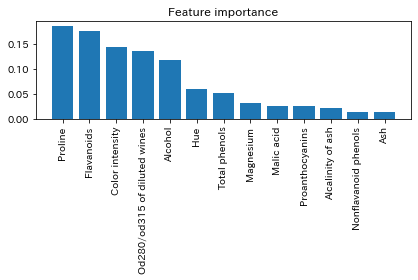

In [210]:
plt.title("Feature importance")
plt.bar(range(X_train.shape[1]), importances[indicies], align='center')
plt.xticks(range(X_train.shape[1]), feat_labels[indicies], rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.tight_layout()

In [211]:
from sklearn.feature_selection import SelectFromModel
sfm = SelectFromModel(forest, threshold=0.1, prefit=True)
X_selected = sfm.transform(X_train)
print('Number of samples that meet this criterion:', X_selected.shape[1])

Number of samples that meet this criterion: 5


In [209]:
for f in range(X_selected.shape[1]):
    print(f"{f+1:2}", f"{feat_labels[indicies[f]]:30}", f"{importances[indicies[f]]:.2f}")
    

 1 Proline                        0.19
 2 Flavanoids                     0.17
 3 Color intensity                0.14
 4 Od280/od315 of diluted wines   0.14
 5 Alcohol                        0.12
